<center><h2>M1 MMA - Optimisation</h2><h3>TP2 : descente de gradient à pas optimal</h3></center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h3>I) Algorithme de descente de gradient à pas optimal</h3>

On considère la fonction suivante définie pour tout $x=(x_0,x_1)\in\mathbb R^2$ par :
$$
f(x) = x_0^2 + 2 x_1^2 + x_0x_1 + x_0 - x_1 + 20.
$$

<b>0) Montrer que $f$ est une fonctionnelle quadratique et qu'elle admet un unique minimum global.</b>

On montre que $f$ se réécrit $f(x) = \frac12 \langle Ax, x\rangle - \langle b, x \rangle + c$ pour tout $x \in \mathbb{R}^2$, avec $A = \begin{pmatrix} 2 & 1 \\ 1 & 4\end{pmatrix}$, $b = (1,-1)$ et $c = 20$. Comme $A$ est symétrique réelle, $\det(A) = 7 > 0$ et $\mbox{Tr}(A) = 6 > 0$, alors ses deux valeurs propres réelles sont strictement positives, ainsi $A$ est symétrique définie positive. Donc $f$ est strictement convexe (puisque sa hessienne est $A$ en tout point de $\mathbb{R}^2$) et $A^{-1}b$ est son unique point critique donc unique minimum global.

<b>1) Implémenter en Python la fonction $f$ et son gradient à l'aide de la matrice symétrique $A$, du vecteur $b$ et de $c\in\mathbb R$ tels que
$$
\forall x \in \mathbb{R}^2, \quad f(x) = \frac12 \langle Ax, x\rangle - \langle b, x \rangle + c.
$$
</b>

In [2]:
A, b, c = np.array([[2, 1], [1, 4]]), np.array([-1, 1]), 20

def f(x):
    return 0.5*np.dot(np.dot(A, x), x) - np.dot(b, x) + c
def gradf(x):
    return np.dot(A, x) - b

<b>2) Tracer les lignes de niveau de $f$ sur $[-5,5]\times[-5,5]$.</b>

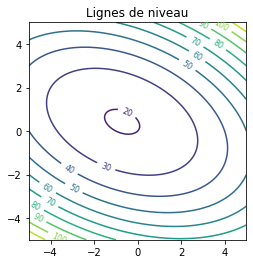

In [3]:
dom = [-5, 5, -5, 5]

# Definition des grilles et evaluation de f
len_grille = 200
X, Y = np.linspace(dom[0], dom[1], len_grille), np.linspace(dom[2], dom[3], len_grille)
X, Y = np.meshgrid(X, Y)

# Z = f([X, Y])
# Cette commande pose soucis si f est implémenté de manière vectorielle (avec des np.dot)
# Une implémentation avec des boucles for est proposée alternativement

Z = np.zeros(X.shape)
for i in range(len_grille):
    for j in range(len_grille):
        Z[i, j] = f(np.array([X[i, j], Y[i, j]]))

# Graphique des lignes de niveaux
fig, ax = plt.subplots(figsize = (4, 4))
CS = ax.contour(X, Y, Z, 10)
ax.clabel(CS, fontsize = 8)
ax.set_title("Lignes de niveau")
ax.set_aspect("equal", adjustable = "box") # pour que les axes aient la même échelle

<b>3) Ecrire une fonction $\mbox{descente_gradient_pas_optimal}$, qui prend en argument un point de départ $x^{(0)}$, la matrice $A$, le vecteur $b$ et une tolérance $\varepsilon$ (pour la condition d'arrêt de l'algorithme), qui représente l'algorithme de descente de gradient à pas optimal. Cette fonction renverra le point final obtenu ainsi que la liste des itérés $x^{(k)}$.</b>

In [4]:
def descente_gradient_pas_optimal(x0, A, b, epsilon):
    # renvoie le dernier itéré et la liste des itérés de la méthode de descente de gradient par pas optimal
    x = x0
    x_list = [x0]
    d = -np.dot(A, x) + b # direction de descente = moins gradient de f
    while np.linalg.norm(d) > epsilon: # tant que la norme du gradient est plus grande que la tolérance on continue
        t = np.dot(d, d)/np.dot(np.dot(A, d), d) # valeur du pas optimal (on a l'expression pour une fonctionnelle quadratique)
        x = x + t*d
        x_list.append(x)
        d = -np.dot(A, x) + b
    return x, x_list

<b>4) On prendra $x^{(0)}=(4,-4)$. Superposer la trajectoire $(x^{(k)})_{k}$ donnée par l'algorithme au graphe des lignes de niveau de $f$. Commenter la trajectoire.</b>

In [5]:
x0 = np.array([4, -4])
xstar_approx_optimal, x_list_optimal = descente_gradient_pas_optimal(x0, A, b, 1e-3)

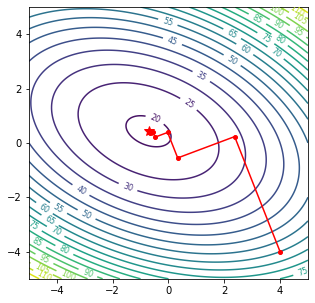

In [6]:
fig, ax = plt.subplots(figsize = (5, 5))
CS = ax.contour(X, Y, Z, 20)
ax.clabel(CS, fontsize = 8)
X_list_optimal = [x_list_optimal[i][0] for i in range(len(x_list_optimal))]
Y_list_optimal = [x_list_optimal[i][1] for i in range(len(x_list_optimal))]
plt.plot(X_list_optimal, Y_list_optimal, marker = "o", ms = 4.0, color = "red")
plt.plot(xstar_approx_optimal[0], xstar_approx_optimal[1], marker = "*", ms = 10.0, color = "r")
plt.show()
ax.set_aspect("equal", adjustable = "box")

On remarque, comme vu en cours, que les changements de direction se font de manière orthogonale (deux gradients successifs sont orthogonaux).

<b>5) Illustrer la convergence de l'algorithme.</b> On pourra déterminer via l'algorithme une approximation du minimum global $x^*$ grâce à une tolérance très petite, et utiliser cette approximation comme si c'était en effet $x^*$ pour le calcul et la représentation des erreurs au cours du temps $k$.

In [7]:
xstar_optimal, x_list_optimal = descente_gradient_pas_optimal(x0, A, b, 1e-10)
xstar_approx_optimal, x_list_optimal = descente_gradient_pas_optimal(x0, A, b, 1e-6)

In [8]:
xstar_optimal

array([-0.71428571,  0.42857143])

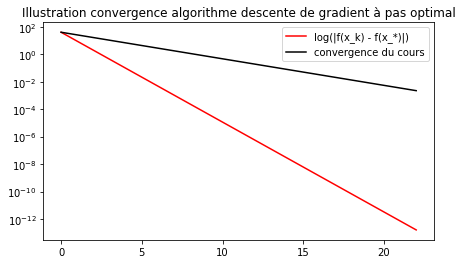

In [9]:
c = (3 + np.sqrt(2))/(3 - np.sqrt(2)) # conditionnement de A : (plus grande vp de A) / (plus petite vp de A)
fig = plt.figure(figsize = (7, 4))
plt.semilogy([np.abs(f(x_list_optimal[i]) - f(xstar_optimal)) for i in range(len(x_list_optimal))], color = 'red', label = 'log(|f(x_k) - f(x_*)|)') # on représente l'erreur entre chaque itéré et la
# valeur limite obtenue via la fonction semilogy qui met l'axe des ordonnées en échelle log.
plt.semilogy([(f(x0) - f(xstar_optimal))*(1-1/c)**k for k in range(len(x_list_optimal))], color = 'black', label = 'convergence du cours')
plt.title('Illustration convergence algorithme descente de gradient à pas optimal')
plt.legend()
plt.show()

On remarque que la convergence de la suite $(f(x_k))_{k\in\mathbb{N}}$ obtenue est bien linéaire puisque $\log(f(x_k) - f(x_*))$ est une fonction affine de $k$, au moins APCR. 

En effet on a au moins pour $k$ suffisamment grand, $\log(f(x^{(k)}) - f(x^*)) = -a k + C$, avec $a>0$, i.e. $f(x^{(k)}) - f(x^*) = C'\alpha^k$ où $\alpha = e^{-a}\in]0,1[$, ce qui correspond bien à dire que $(f(x_k))_{k\in\mathbb{N}}$ converge linéairement vers $f(x^*)$.

Cependant on remarque que la pente est bien plus raide que celle donnée par la convergence du cours (en noir sur la figure). Cela signifie que le taux de convergence linéaire de la $(f(x_k))_{k\in\mathbb{N}}$ est inférieur à la borne $1-\frac1c$ du cours (où $c$ est le conditionnnement de $A$). Ceci s'explique par le fait que la borne trouvée en cours fonctionne pour <b>toute</b> fonction $f$ satisfaisant les hypothèses du théorème de convergence, mais n'est donc pas forcément optimale pour certains cas particuliers ou sous classe de fonctions satisfaisant des hypothèses plus strictes. C'est notamment le cas pour les fonctionnelles quadratiques comme ici.

<b>6) Observer votre code : quelle est l'opération la plus couteuse numériquement à chaque passage dans la boucle ? Quelle en est la complexité ? Combien de fois est-elle présente dans votre code ?</b>

C'est l'application de la matrice $A$. La complexité de cette opération est $O(n^2)$ où $n$ est la taille de la matrice. Les autres opérations sont des produits scalaires dont la complexité est $O(n)$. Dans le code au dessus, on applique deux fois la matrice $A$.

<b>7) Montrer qu'il est possible d'adapter l'implémentation de sorte qu'une seule de ces opérations est nécessaire.</b>

On voit que l'on applique $A$ une fois à $d^{(k)}$, pour obtenir le pas $t^{(k)}$, puis une autre à $x^{(k+1)}$ pour obtenir la nouvelle direction de descente $d^{(k+1)}$. Or on remarque que $d^{(k+1)} = -Ax^{(k+1)} + b = -Ax^{(k)}+b - t^{(k)} A d^{(k)} = d^{(k)} - t^{(k)} A d^{(k)}$, puisque $x^{(k+1)} = x^{(k)} + t^{(k)} d^{(k)}$. On a donc réussi à exprimer la nouvelle direction de descente à partir de la quantité déjà calculé $Ad^{(k)}$. Ainsi on peut obtenir la nouvelle direction de descente sans appliquer une deuxième fois $A$, pourvu que l'on stocke dans une variable la quantité $Ad^{(k)}$.

Voici la version optimisée du code :

In [10]:
def descente_gradient_pas_optimal_efficace(x0, A, b, epsilon):
    # renvoie le dernier itéré et la liste des itérés de la méthode de descente de gradient par pas optimal
    n = 0
    x = x0
    x_list = [x0]
    d = -np.dot(A, x) + b # moins gradient de f
    Ad = np.dot(A, d) # on stocke le produit A*d dans une variable que l'on utilise dans le calcul du pas 
    # et de la nouvelle direction de descente
    while np.linalg.norm(d) > epsilon: # tant que la norme du gradient est plus grande que la tolérance on continue
        t = np.dot(d, d)/np.dot(Ad, d) # valeur du pas optimal, car f fonctionnelle quadratique
        x = x + t*d
        x_list.append(x)
        d = d - t*Ad # on utilise la relation trouvée au dessus
        Ad = np.dot(A, d) # on met à jour Ad. C'est la seule application de la matrice A dans la boucle.
        n += 1
    return x, x_list

In [11]:
xstar_optimal, x_list_optimal = descente_gradient_pas_optimal_efficace(x0, A, b, 1e-10)

In [12]:
xstar_optimal

array([-0.71428571,  0.42857143])

<h3>II) Applications au débruitage d'images</h3>

Dans toute la suite, on utilisera la fonction suivante quand il y a des produits scalaires à calculer.

In [13]:
def ps(x, y):
    # produit scalaire entre x et y, qui peuvent être des vecteurs ou des matrices.
    return np.sum(x*y)

On charge l'image sur laquelle on va travailler

Récupérer l'image à l'adresse : https://qdenoyelle.github.io/M1_Optim/TP/hameau.png et la placer dans le dossier où le TP se situe.

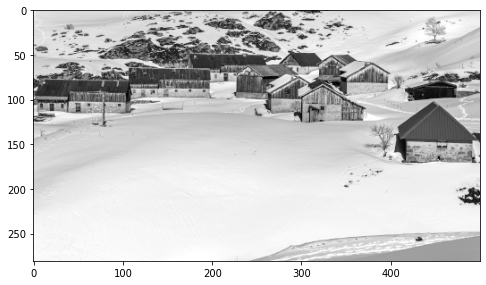

In [14]:
plt.figure(figsize = (8, 6))
img_original = plt.imread("hameau.png").astype(float) # chargement de l'image
img_original = sum([img_original[:, :, i] for i in range(2)]) # on transforme l'image en noir et blanc
img_original = 1/(np.max(img_original)-np.min(img_original))*(img_original - np.min(img_original))
plt.imshow(img_original, cmap = 'gray') # affichage de l'image
plt.show()

On va traiter l'image comme une matrice dont les coefficients sont le niveau de gris des pixels.

In [15]:
n, m = img_original.shape # on récupère le nombre de ligne et de colonnes.
print("Nombre de lignes : ", n)
print("Nombre de colonnes : ", m)

Nombre de lignes :  281
Nombre de colonnes :  500


On va maintenant dégrader l'image par un bruit additif gaussien (en pratique on aurait uniquement accès à l'image bruitée, ici on cré "artificiellement" le bruit).

In [16]:
bruit = .2 * np.random.randn(n, m) # bruit gaussien qui va être appliqué sur l'image
img_bruite = img_original + bruit # on bruite additivement l'image

<b>1) Afficher l'image bruitée.</b>

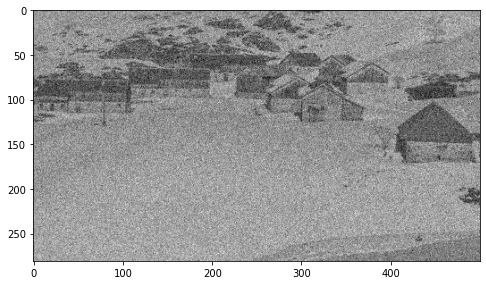

In [17]:
plt.figure(figsize = (8, 6))
plt.imshow(img_bruite, cmap = "gray") # affichage de l'image
plt.show()

Dans la suite les images seront vues comme des tableaux de valeurs (chaque pixel est un nombre représentant le niveau de gris), c'est à dire des matrices à $n$ lignes et $m$ colonnes.

On va maintenant chercher à débruiter l'image ci-dessus (i.e. diminuer l'impact du bruit). La méthode adoptée va consister à résoudre le problème d'optimisation suivant
$$
\min_{x\in\mathcal{M}_{n,m}(\mathbb{R})} F(x),
$$
où
$$
F(x) = \frac12 \sum_{i=1}^n\sum_{j=1}^m (x_{i,j} - y_{i,j})^2 + \frac{\lambda}2 \sum_{i=1}^{n-1}\sum_{j=1}^m (x_{i+1,j} - x_{i,j})^2 + \frac{\lambda}2 \sum_{i=1}^{n}\sum_{j=1}^{m-1} (x_{i,j+1} - x_{i,j})^2.
$$
$y\in\mathcal{M}_{n,m}(\mathbb{R})$ est l'image bruitée (la donnée du problème) et $\lambda>0$ une constante.

<b>2) Quel est la dimension de ce problème d'optimisation (i.e. la dimension de l'espace sur lequel on résout le problème) ?</b>

La dimension du problème d'optimisation est $nm=\dim(\mathcal{M}_{m,n}(\mathbb{R}))$.

In [18]:
print("Dimension du problème : ", m*n)

Dimension du problème :  140500


<b>3) Interpréter $F$.</b>

$F$ est composé de trois termes. Le premier représente un terme d'attache aux données : il mesure l'erreur quadratique au carrée entre une estimation $x$ et la donnée du problème $y$ (l'image bruitée). Les deux autres termes mesurent la variation de $x$ entre deux pixels successifs respectivement verticalement et horizontalement. En minimisant cette fonction objectif, on va ainsi obtenir un $x$ ($F$ admet un unique minimum global, cf ci-dessous) qui est proche de la donnée du problème tout en lissant les variations locales : on atténue ainsi l'impact du bruit. Le compromis entre être proche des données et l'atténuation du bruit est controlé par le paramètre $\lambda$ (plus $\lambda$ est grand plus l'image sera lissée car les deux derniers termes deviennent plus pénalisant s'ils sont grands). L'inconvénient de cette méthode est que l'image obtenue devient flou : c'est le prix à payer de cette approche de débruitage. D'autres fonctions objectifs peuvent être considérées pour à la fois débruiter mais préserver la netteté des contours.

<b>4) Démontrer que $F$ peut s'écrire sous la forme
$$
\forall x\in\mathcal{M}_{n,m}(\mathbb{R}), \quad F(x) = \frac12 \langle \mathcal{A}(x), x \rangle - \langle b, x\rangle + c,
$$
où
<ul>
<li>$\langle \cdot, \cdot \rangle$ est le produit scalaire canonique sur l'espace $\mathcal{M}_{n,m}(\mathbb{R})$, c'est-à-dire $\langle x, x' \rangle = \mbox{Tr}(x^Tx') = \sum_{i,j} x_{i,j}x'_{i,j}$,</li>
<li>$\mathcal{A}:\mathcal{M}_{n,m}(\mathbb{R})\to\mathcal{M}_{n,m}(\mathbb{R})$ est un opérateur linéaire,</li>
<li>$b\in\mathcal{M}_{n,m}(\mathbb{R})$ et $c \in \mathbb R$.</li>
</ul>

On pourra introduire les matrices $L\in\mathcal{M}_{n, n}(\mathbb{R})$ avec des $-1$ sur la diagonale, et des $1$ sur la sur-diagonale, et $L_{n, n}=0$, et $C\in\mathcal{M}_{m, m}(\mathbb{R})$ la matrice avec des $-1$ sur la diagonale, $1$ sur la sous-diagonale et $C_{m, m}=0$</b>.

On a $F(x) = \frac12 \langle x - y, x - y\rangle + \frac\lambda2 \langle Lx, Lx\rangle + \frac\lambda2 \langle xC, xC\rangle$. D'où en utilisant le fait que
$$\langle xC, xC\rangle = \mbox{Tr}((xC)^TxC) = \mbox{Tr}(C^Tx^TxC) = \mbox{Tr}(x^TxCC^T) = \langle x, xCC^T\rangle,$$
puisque $\mbox{Tr}(AB) = \mbox{Tr}(BA)$, on obtient 
$$F(x) = \frac12\langle \langle \mathcal{A}(x), x \rangle - \langle b, x\rangle + c,$$
avec $\mathcal A(x) = x + \lambda L^TLx + \lambda xCC^T$, $b = y$ et $c = \frac12 \|y\|_2^2$.

<b>5) Démontrer que $\mathcal{A}$ est un endomorphisme symétrique, c'est-à-dire pour tous $x,x'\in\mathcal{M}_{m,n}(\mathbb{R})$, $\langle \mathcal{A}(x), x' \rangle = \langle x, \mathcal{A}(x') \rangle$, puis que $\mathcal{A}$ est définie positive, c'est-à-dire pour tous $x\neq0$, $\langle \mathcal{A}(x), x \rangle >0$.</b>

On a $\langle \mathcal{A}(x), x' \rangle = \langle x, x' \rangle + \lambda\langle L^TLx, x' \rangle + \lambda\langle xCC^T, x' \rangle = \langle x, x' \rangle + \lambda\langle x, L^TLx' \rangle + \lambda\langle x, x'CC^T \rangle = \langle x, \mathcal{A}(x') \rangle$. D'où $\mathcal{A}$ est un endormorphisme symétrique.

Ensuite $\langle \mathcal{A}(x), x \rangle = \|x\|_2^2 + \|Lx\|_2^2 + \|Cx\|_2^2 \geq \|x\|_2^2 > 0$ dès que $x\neq 0$. D'où $\mathcal{A}$ est un endormorphisme symétrique défini positif.

<b>6) Justifier que $F$ admet un unique minimum global.</b>

D'après le cours, $F$ est une fonctionnelle quadratique. $F$ admet un unique point critique (car $\mathcal{A}$ est inversible puisque symétrique défini positif) et comme $F$ est convexe (puisque $\mathcal{A}$ positif) $F$ admet donc un unique minimum global.

Une autre justification : on a démontré en 5) que $F$ est fortement convexe donc $F$ admet un unique minimum global (car $F$ est coercive et strictement convexe).

<b>7) Ecrire une fonction $\mbox{opA}$ qui prend comme argument $x$ et qui renvoie $\mathcal{A}(x)$. On pourra commencer par créer les deux matrices $L$ et $C$ à l'aide de la commande np.eye (penser à regarder l'effet par exemple de np.eye(4) et np.eye(4, k = 1)).</b>

In [19]:
L = - np.eye(n) + np.eye(n, k = 1)
L[n - 1, n - 1] = 0

C = - np.eye(m) + np.eye(m, k = -1)
C[m - 1, m - 1] = 0

lbda = 1
def opA(x):
    return (lbda*np.dot(np.dot(np.transpose(L), L), x) + lbda*np.dot(x, np.dot(C, np.transpose(C))) + x)

<b>8) Ecrire une fonction $\mbox{fobj}$ qui renvoient pour une matrice $x$, la valeur $F(x)$ du problème d'optimisation considéré.</b>

In [20]:
def fobj(x):
    return .5*ps(opA(x), x) - ps(b, x) + .5*ps(b, b)

<b>9) Reprendre la fonction effectuant la descente de gradient à pas optimal et l'adapter pour qu'elle deviennent opérante dans le cas étudié ici : $A$ n'est plus une matrice mais un opérateur linéaire (donc une fonction), le produit scalaire est celui entre les matrices.</b>

In [21]:
def descente_gradient_pas_optimal(x0, A, b, epsilon):
    # renvoie le dernier itéré et la liste des itérés de la méthode de descente de gradient à pas optimal
    x = x0
    x_list = [x0]
    d = -A(x) + b # moins gradient de F
    Ad = A(d) # on stocke A(d) dans une variable que l'on utilise dans le calcul du pas 
    # et de la nouvelle direction de descente
    while np.linalg.norm(d) > epsilon: # tant que la norme du gradient est plus grande que la tolérance on continue
        t = ps(d, d)/ps(Ad, d) # valeur du pas optimal, car F fonctionnelle quadratique
        x = x + t*d
        x_list.append(x)
        d = d - t*Ad
        Ad = A(d) # on met à jour Ad. C'est la seul application de l'opérateur A dans la boucle.
    
    return x, x_list

<b>10) Utiliser l'algorithme pour le résoudre le problème d'optimisation. On prendra pour l'instant $\lambda = 5$. Afficher l'image débruitée.</b>

In [22]:
lbda = 5
b = img_bruite # b = image bruitée d'après précédentes questions
x0 = img_bruite # on peut démarrer l'algorithme en n'importe quel point de l'espace d'optimisation. On choisit de démarrer avec l'image de départ
x, x_list = descente_gradient_pas_optimal(x0, opA, b, 1e-8)
fobj_opt = fobj(x)

In [23]:
x, x_list = descente_gradient_pas_optimal(x0, opA, b, 1e-4)

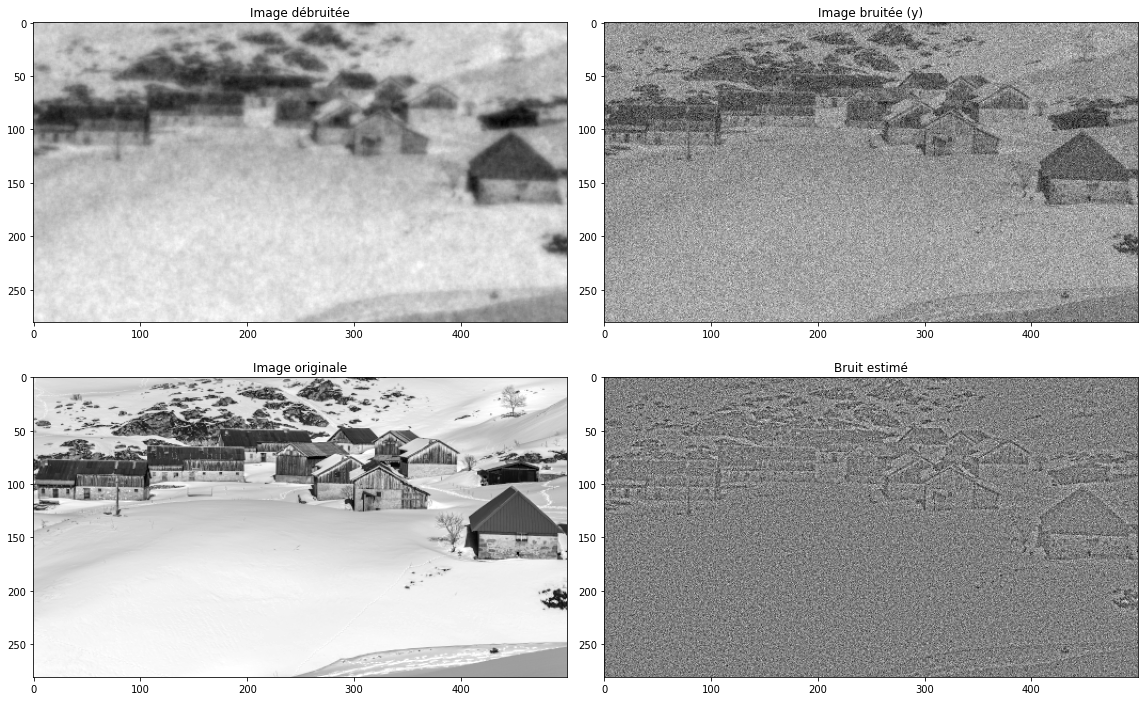

In [24]:
plt.figure(figsize = (16, 10))
#
plt.subplot(2, 2, 1)
plt.imshow(x, cmap = 'gray')
plt.title('Image débruitée')
#
plt.subplot(2, 2, 2)
plt.imshow(img_bruite, cmap = 'gray')
plt.title('Image bruitée (y)')
#
plt.subplot(2, 2, 3)
plt.imshow(img_original, cmap = 'gray')
plt.title('Image originale')
#
plt.subplot(2, 2, 4)
plt.imshow(img_bruite - x, cmap = 'gray')
plt.title('Bruit estimé')
plt.tight_layout()
plt.show()

<b>11) Illustrer la convergence de la méthode.</b>

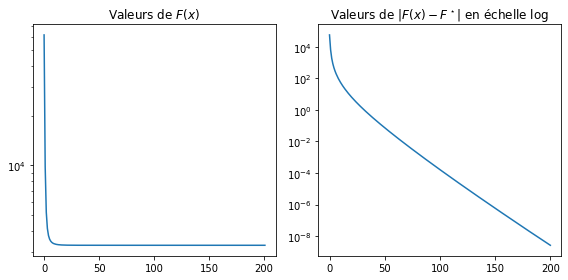

In [25]:
plt.figure(figsize = (8, 4))
plt.subplot(1, 2, 1)
plt.semilogy([fobj(x_list[i]) for i in range(len(x_list))])
plt.title("Valeurs de $F(x)$")
plt.subplot(1, 2, 2)
plt.semilogy([abs(fobj(x_list[i]) - fobj_opt) for i in range(len(x_list) - 1)])
plt.title("Valeurs de $|F(x) - F^\star|$ en échelle $\log$")
plt.tight_layout()
plt.show()

On note la convergence linéaire de la fonction objectif, puisque pour $n$ suffisamment grand : $\log(F(x_n) - F^\star) = -a n + C$, avec $a>0$, i.e. $F(x_n) - F^\star = C'\alpha^n$ où $\alpha = e^{-a}\in]0,1[$.

<b>12) Discuter de l'influence de $\lambda$.</b>

Plus $\lambda$ est grand plus l'image devient flou (on lisse plus l'image).